In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

In [30]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, na_values="?")



In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [32]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<Axes: >

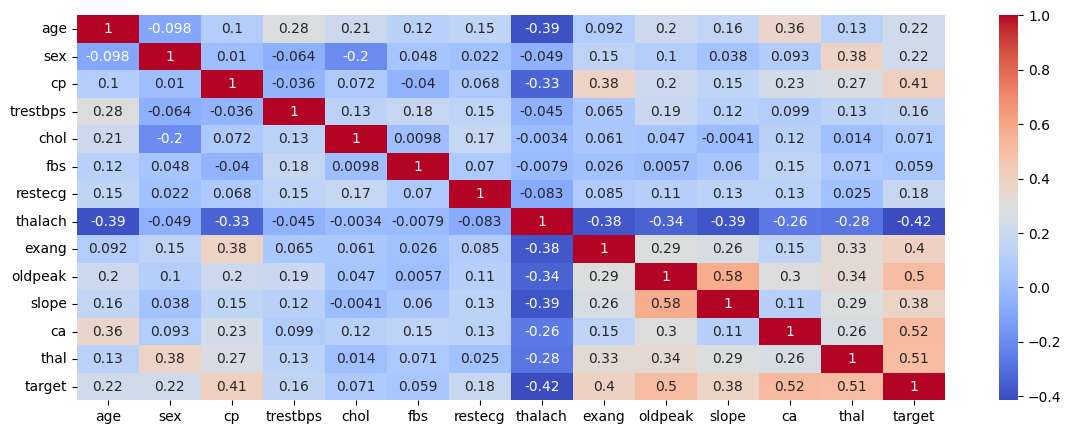

In [37]:
plt.figure(figsize=(14, 5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [23]:
 #binary classification# Preprocessing
data = data.dropna()  # Drop rows with missing values
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert target to

<ipython-input-23-c96784d7bece>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert target to


In [24]:
data['target']

,target
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [25]:
# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
# Define the CNN model
def create_cnn_model(learning_rate=0.001, num_neurons=64, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model




In [27]:

class GrasshopperOptimization:
    def __init__(self, population_size, num_iterations, search_space):
        self.population_size = population_size
        self.num_iterations = num_iterations
        self.search_space = search_space
        self.best_solution = None
        self.best_fitness = float('inf')

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            solution = {}
            for param, (lower, upper) in self.search_space.items():
                solution[param] = np.random.uniform(lower, upper)
            population.append(solution)
        return population

    def evaluate_fitness(self, solution):
      try:
        model = create_cnn_model(learning_rate=solution['learning_rate'],
                                 num_neurons=int(solution['num_neurons']),
                                 dropout_rate=solution['dropout_rate'])
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        return accuracy  # We want to maximize accuracy
      except Exception as e:
        print(f"Error during fitness evaluation: {e}")
        return 0  # Return a default fitness value if evaluation fails

    def update_grasshoppers(self, population):
        for i in range(self.population_size):
            new_solution = {}
            for param in self.search_space.keys():
                new_solution[param] = population[i][param] + np.random.uniform(-1, 1)
                # Ensure the new value is within the search space
                new_solution[param] = np.clip(new_solution[param], self.search_space[param][0], self.search_space[param][1])
            population[i] = new_solution
        return population

    def optimize(self):
      population = self.initialize_population()
    # Initialize best_solution and best_fitness
      self.best_solution = population[0]
      self.best_fitness = self.evaluate_fitness(population[0])

      for iteration in range(self.num_iterations):
          for i in range(self.population_size):
              fitness = self.evaluate_fitness(population[i])
              if fitness > self.best_fitness:
                  self.best_fitness = fitness
                  self.best_solution = population[i]
          population = self.update_grasshoppers(population)
          print(f"Iteration {iteration + 1}, Best Fitness: {self.best_fitness}")
      return self.best_solution, self.best_fitness



In [28]:
search_space = {
    'learning_rate': (0.003, 0.01),
    'num_neurons': (32, 128),
    'dropout_rate': (0.2, 0.5)
}

# Initialize and run the GHO optimizer
gho = GrasshopperOptimization(population_size=10, num_iterations=20, search_space=search_space)
best_solution, best_fitness = gho.optimize()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [ ]:
final_model = create_cnn_model(learning_rate=best_solution['learning_rate'],
                               num_neurons=int(best_solution['num_neurons']),
                               dropout_rate=best_solution['dropout_rate'])
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


In [ ]:
y_pred = final_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)



In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_curve, precision_curve)

plt.figure()
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:

final_model = create_cnn_model(learning_rate=best_solution['learning_rate'],
                               num_neurons=int(best_solution['num_neurons']),
                               dropout_rate=best_solution['dropout_rate'])

# Train the model with validation data
history = final_model.fit(X_train, y_train,
                          epochs=50,
                          batch_size=32,
                          validation_data=(X_test, y_test),
                          verbose=1)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()